<a href="https://colab.research.google.com/github/Arjun-R-krishnan/Unsupervised-Learning-Techniques/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

## Loading the dataset

In [2]:
iris = load_iris()

In [3]:
# Display the content of the iris dataset
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
# Print the names of the features (columns) in the iris dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Print the names of the target classes in the iris dataset
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Create a DataFrame from the iris dataset with feature data
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:
# Display the first 5 rows of the iris DataFrame to quickly preview the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Add a 'species' column to iris_df by mapping numeric target values (iris.target) to species names (iris.target_names)
iris_df['species'] = iris.target_names[iris.target]

In [9]:
# Display the first 5 rows of the iris DataFrame to quickly preview the dataset
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# Display a concise summary of the iris DataFrame, including column names, data types, and non-null values
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Check for missing values in each column of the iris DataFrame and display the total count of null values per column
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


## Visualizing the Correlation Matrix

In [12]:
# Calculate the correlation matrix for the numerical columns in iris_df, excluding the 'species' column
cor_matrix =iris_df.drop(columns = ['species']).corr()

In [13]:
cor_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


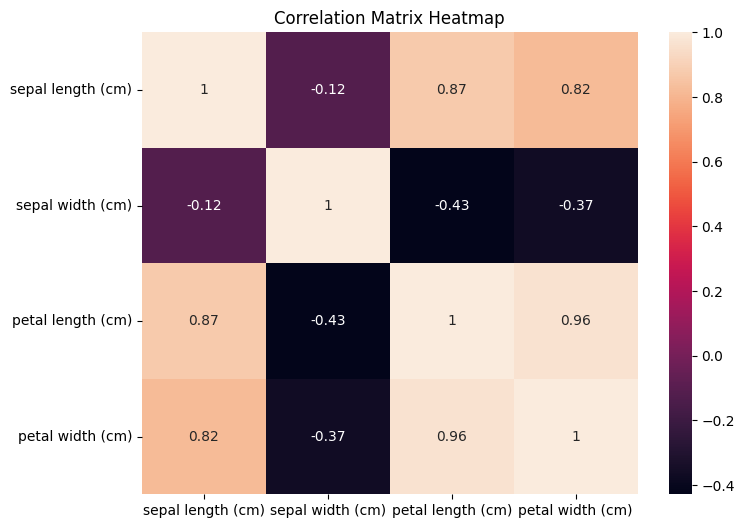

In [14]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
#Adjust the figure size as needed
sns.heatmap(cor_matrix, annot=True,)
# Add title to the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

### From the correlation matrix, we observe that the columns for petal length and petal width exhibit the highest correlation. Therefore, plotting a heatmap between these two features will provide a clearer view of the species clustering



## Creating a scatter plot to visualize the relationship between petal width and petal length across different species.








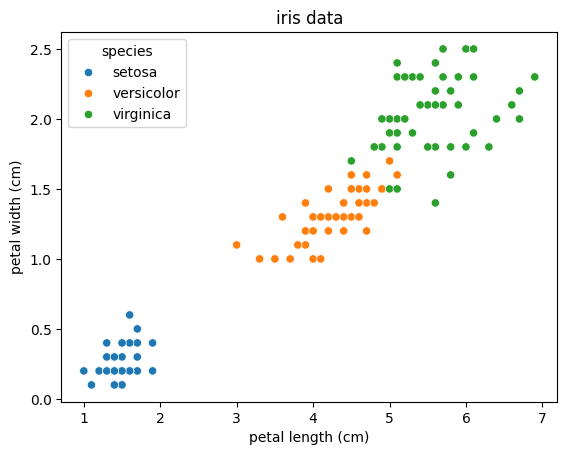

In [15]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',data = iris_df,hue ='species')
plt.title("iris data")
plt.show()

### Creating a new DataFrame for applying the K-Means algorithm, excluding the species column.

In [16]:
# Creating a new DataFrame by dropping the 'species' column
# This is done to apply the K-Means algorithm on the remaining numerical data
X_km = iris_df.drop(columns = ['species'])

In [17]:
X_km.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## What is K-Means Clustering?

K-Means clustering is an **unsupervised machine learning algorithm** used to partition a dataset into distinct groups or clusters. The algorithm works by following these steps:

1. **Initializing cluster centroids**:
   - Random points (centroids) are chosen as initial cluster centers.

2. **Assigning points to clusters**:
   - Each data point is assigned to the nearest centroid based on distance (usually Euclidean distance).

3. **Updating centroids**:
   - Once all points are assigned, the algorithm recalculates the centroids by taking the mean of all the points in each cluster.

4. **Iterating**:
   - Steps 2 and 3 are repeated until the cluster assignments stabilize (i.e., the centroids don't move significantly).

The number of clusters, denoted by **K**, is predefined by the user

## Why is K-Means Suitable for the Iris Data?

1. **Unlabeled Data**:  
   The features of the Iris dataset (e.g., petal length, petal width, etc.) are numerical. K-Means can group similar observations into clusters without needing the species label, as it is an unsupervised learning algorithm.

2. **Natural Clusters**:  
   The three species in the dataset (Iris setosa, Iris versicolor, and Iris virginica) form natural groupings in the feature space. K-Means clustering can reveal these species separations based on feature similarity.

3. **Simple and Efficient**:  
   K-Means is straightforward to implement and computationally efficient, making it ideal for datasets like Iris, which is small and exhibits clear distinctions between clusters.

4. **Exploratory Analysis**:  
   K-Means aids in exploring the structure of the dataset. By clustering, we can evaluate how well the algorithm groups the flowers and check whether these groups align with the actual species.

In [18]:
# Initializing an empty list to store the inertia values for different numbers of clusters
inertia = []

In [19]:
# Defining a range of values from 1 to 10 for the number of clusters (K) to evaluate
k_range = range(1,11)

In [20]:
# Iterating through each value of K in the defined range
for k in k_range:
    # Initializing the KMeans algorithm with the current number of clusters (k) and a fixed random state for reproducibility
    kmeans = KMeans(n_clusters = k ,random_state = 42)
    # Fitting the KMeans model to the data (X_km) to compute cluster centers and assign labels
    kmeans.fit(X_km)
    # Appending the inertia value (sum of squared distances of samples to their closest cluster center) for the current k to the inertia list
    inertia.append(kmeans.inertia_)

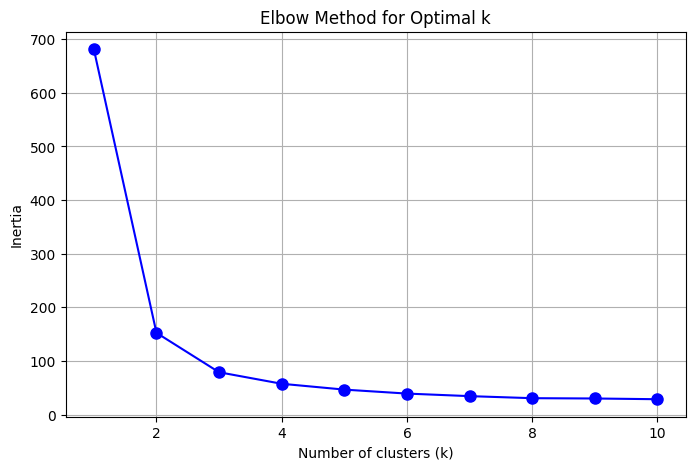

In [21]:
#plotting the graph for finding the optimal value of k from Elbow mehod
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

## The graph indicates that the optimal value of 𝑘 is 3

In [22]:
# Initializing the KMeans model with 3 clusters and a fixed random state for reproducibility
kmeans_model= KMeans(n_clusters=3,random_state =3)

In [23]:
# Fitting the KMeans model to the data (X_km) to compute cluster centers and assign cluster labels
kmeans_model.fit(X_km)

KMeans(n_clusters=3, random_state=3)

In [24]:
# Retrieving the cluster labels assigned to each data point by the fitted KMeans model
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [25]:
# Assigning the cluster labels from the KMeans model to a new column named 'cluster' in the DataFrame X_km
X_km['cluster'] =kmeans_model.labels_

In [26]:
X_km.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


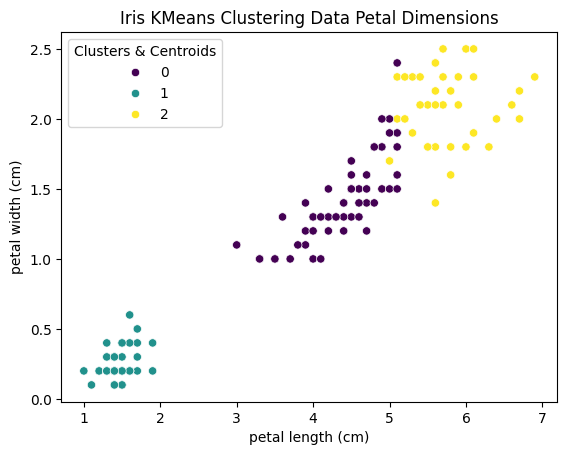

In [27]:
# visualize the clusters. (Iris KMeans Clustering Data Petal Dimensions)
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data=X_km, hue='cluster',palette='viridis')
plt.title('Iris KMeans Clustering Data Petal Dimensions')
plt.legend(title='Clusters & Centroids')
plt.show()

##  The silhouette score measures how similar a data point is to its own cluster compared to other clusters


In [28]:
# Calculating the silhouette score to evaluate the quality of the clustering
silhouette_avg = silhouette_score(X_km,kmeans_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.68468524942902


### Hierarchical Clustering

Hierarchical clustering is an **unsupervised machine learning algorithm** used to group similar data points into a hierarchy of clusters. Unlike K-Means, which requires the number of clusters to be specified in advance, hierarchical clustering creates a tree-like structure called a **dendrogram**.

#### How Hierarchical Clustering Works:

1. **Agglomerative Approach**:
   - The most common method, where each data point starts as its own cluster.
   - The algorithm repeatedly merges the two closest clusters until all points belong to a single cluster or a predefined number of clusters is reached.

2. **Divisive Approach**:
   - The less common method, which starts with all data points in one cluster and recursively splits it into smaller clusters.

3. **Distance Metrics**:
   - Different distance metrics (e.g., Euclidean, Manhattan) can be used to measure the similarity between points, affecting the final cluster arrangement.

4. **Linkage Criteria**:
   - Various linkage criteria (e.g., single-linkage, complete-linkage, average-linkage) can determine how the distance between clusters is calculated.

#### Why Hierarchical Clustering is Suitable for the Iris Dataset

1. **Natural Grouping**:
   - The Iris dataset consists of three species of iris flowers, which can be naturally grouped based on their measurements (sepal length, sepal width, petal length, and petal width). Hierarchical clustering can reveal these inherent groupings without prior knowledge of the species.

2. **No Need to Predefine Clusters**:
   - Unlike K-Means, hierarchical clustering does not require the number of clusters to be specified in advance. This is beneficial when the optimal number of clusters is unknown.

3. **Dendrogram Visualization**:
   - The dendrogram produced by hierarchical clustering provides a visual representation of the clustering process, allowing for easy interpretation of the relationships between the clusters.

4. **Interpretability**:
   - The hierarchical structure allows for easy exploration of different levels of clustering, which can help in understanding the data better.

5. **Handling Different Shapes**:
   - Hierarchical clustering is more flexible than K-


In [29]:
# Creating a DataFrame for hierarchical clustering that excludes the species column
X_hc = iris_df.drop(columns = ['species'])

In [30]:
X_hc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
# Calculating the linkage matrix using the Ward's method to minimize the variance within clusters
linkage_matrix = linkage(X_hc, method='ward')

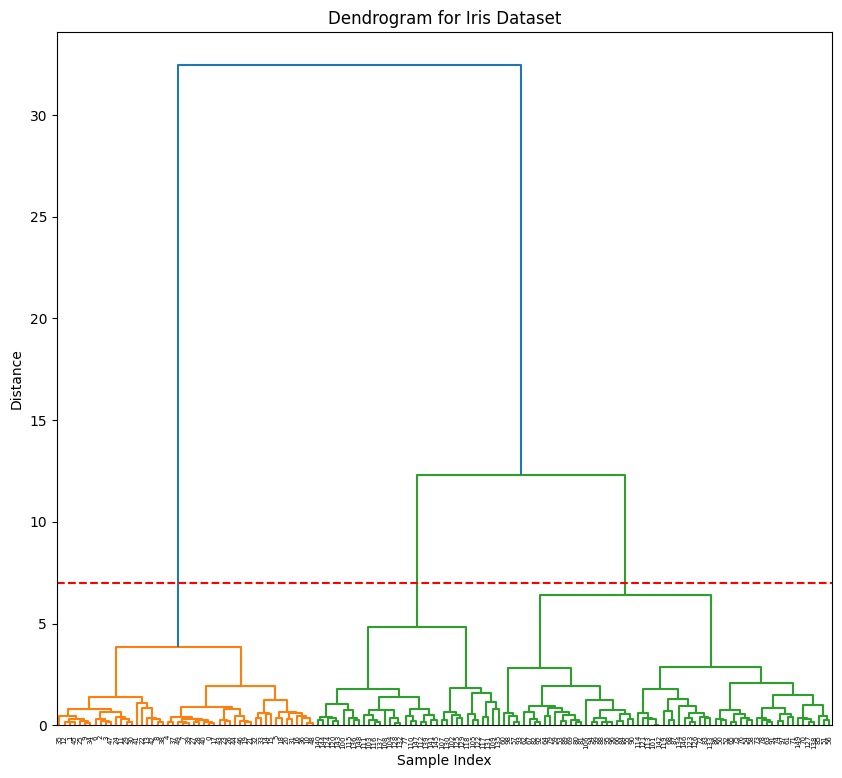

In [32]:
# Plot the dendrogram
plt.figure(figsize=(10, 9))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=7, color='r', linestyle='--')
plt.show()

## The dendrogram indicates that the optimal number of clusters is 3








In [33]:
hc_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = hc_cluster.fit_predict(X_hc)

In [34]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [35]:
X_hc['cluster'] = cluster_labels

In [36]:
X_hc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


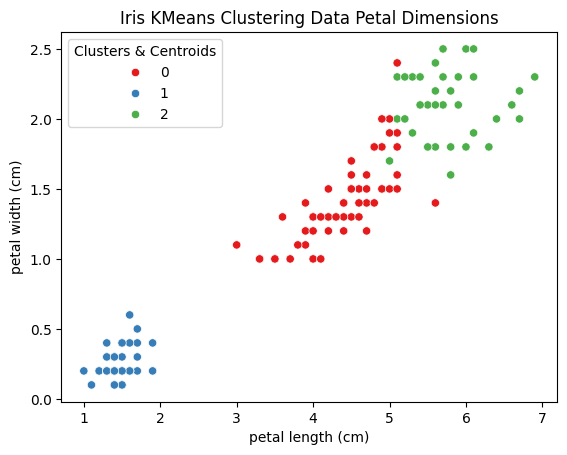

In [37]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data=X_hc, hue='cluster',palette='Set1')
plt.title('Iris KMeans Clustering Data Petal Dimensions')
plt.legend(title='Clusters & Centroids')
plt.show()

In [38]:
# Calculating the silhouette score to evaluate the quality of the clustering
silhouette_avg_hc = silhouette_score(X_hc,cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.68468524942902
